In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal

In [8]:
data = pd.read_csv("C:\\Users\\mahdi\\Desktop\\bridge\\no_drive\\0x9\\bridge_no_drive_0x9.csv")

In [9]:
datatime = np.ravel(data[["Time [s]"]].to_numpy())
bridge_ac = np.ravel(data[["Bridge-in"]].to_numpy())
len(bridge_ac)

1692876

In [10]:
sampling_rate = np.mean(np.ediff1d(datatime))
print(f'sampling_period={sampling_rate}')
fs = 1 / sampling_rate
print(f'sampling rate={fs}')

sampling_period=6.400000000000001e-07
sampling rate=1562499.9999999998


In [11]:
# zero mean the signal
bridge_ac -= np.mean(bridge_ac)
np.mean(bridge_ac)

9.095314151371067e-18

In [14]:
driven_ac = 8572
samples_per_resonance_period = fs / driven_ac
print(f'samples_per_resonance_period={samples_per_resonance_period}')

# evaluate 100 cycles
sample_count = int(np.ceil(samples_per_resonance_period * 40))
sig = bridge_ac[:sample_count]
sos = signal.butter(10, 100e3, fs=fs, output='sos')
sig = signal.sosfilt(sos, sig)
print(f'len(sig)={len(sig)}')

#Nfft = util.nextpow2(sample_count)
Nfft = 8192*2
print(f'Nfft={Nfft}')

ffted = np.fft.rfft(sig, Nfft)
freqs = np.linspace(0, fs//2, num=ffted.size)

samples_per_resonance_period=182.27951469902004
len(sig)=7292
Nfft=16384


array([  381.46923828,   953.6730957 ,  1811.97888184, 10108.93481445,
       20217.86962891, 30326.80444336, 40340.37194824, 50449.3067627 ])

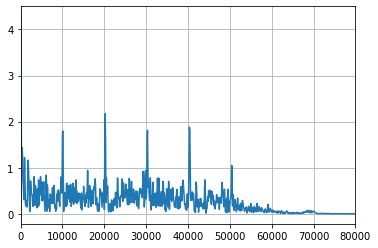

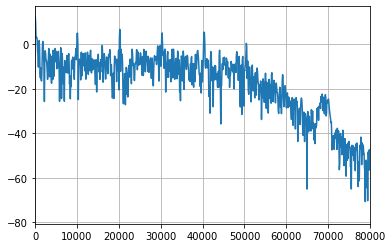

In [15]:
import matplotlib.pyplot as plt
amplitude = np.abs(ffted)
magnitude = 20 * np.log10(amplitude)
plt.plot(freqs, amplitude)
#plt.xlim(5e3, 100e3)
plt.xlim(0, 80e3)
#plt.xlim(25e3, 35e3)
#plt.xlim(0,50e3)
plt.grid()
plt.figure()
plt.plot(freqs, magnitude)
#plt.xlim(5e3, 100e3)
plt.xlim(0, 80e3)
plt.grid()
peaks = signal.find_peaks(magnitude, height=0)
peak_freqs = freqs[peaks[0]]
peak_freqs